# 2. Filter and Process Video Metadata

Now that we have all the data fro Alex Jones' uploads between January 1, 2015 and May 5, 2018, we can filter
out the videos that do not mention the mainstream media and then briefly analyze this. 

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()


In [222]:

def filter_rows(df, words):

    contains_words = '|'.join(words)

    df['video_title'] = df['video_title'].str.lower()
    name_contains = df['video_title'].str.contains(contains_words,  na=False)
    #description_contains = df['video_description'].str.contains(contains_words,  na=False)
    

    filtered_df = df[name_contains]# | description_contains]
    other_rows = df[~name_contains]# & ~description_contains]
    #filtered_df.to_csv("../data/video_metadata_mainstream_media.csv", sep=',', encoding="utf-8", index = False, header=True)

    return filtered_df, other_rows


In [223]:
def analyze(mm_rows, other_rows):    
    mm_rows.head()
    mm_rows.set_index('video_publish_date', inplace=True)
    other_rows.set_index('video_publish_date', inplace=True)


    mm_rows['like/dislike'] = mm_rows['video_like_count']/(mm_rows['video_dislike_count'] + mm_rows['video_like_count'])
    other_rows['like/dislike'] = other_rows['video_like_count']/(other_rows['video_dislike_count'] + other_rows['video_like_count'])


    print mm_rows.describe(include=[np.number])
    print other_rows.describe(include=[np.number])
    
    '''
    fig=plt.figure(figsize=(17,10))
    hist_mm = mm_rows.hist(column='video_comment_count', bins=50, range=(0,5000))
    
    fig=plt.figure(figsize=(17,10))
    hist_o = other_rows.hist(column='video_comment_count', bins=50, range=(0,5000))
    '''
    
    mm_rows[['video_like_count']].plot(figsize=(20,10), linewidth=5, fontsize=20)
    plt.xlabel('Publish Date', fontsize=20);
    
    other_rows[['video_like_count']].plot(figsize=(20,10), linewidth=5, fontsize=20)
    plt.xlabel('Publish Date', fontsize=20);

    
    

        
    return

/Users/arianeschang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/Users/arianeschang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


       video_view_count  video_like_count  video_dislike_count  \
count        806.000000        806.000000           806.000000   
mean       42789.667494       1279.848635            57.416873   
std        65433.303102       1549.109768           108.650674   
min         2093.000000         83.000000             3.000000   
25%        13444.750000        437.250000            18.000000   
50%        23870.500000        807.000000            32.000000   
75%        45908.500000       1452.750000            57.000000   
max       910627.000000      15957.000000          1482.000000   

       video_comment_count  like/dislike  
count           806.000000    806.000000  
mean            357.074442      0.951777  
std             441.633773      0.048844  
min               8.000000      0.476303  
25%             118.250000      0.945434  
50%             229.500000      0.963604  
75%             405.750000      0.975282  
max            4599.000000      0.993684  
       video_view_

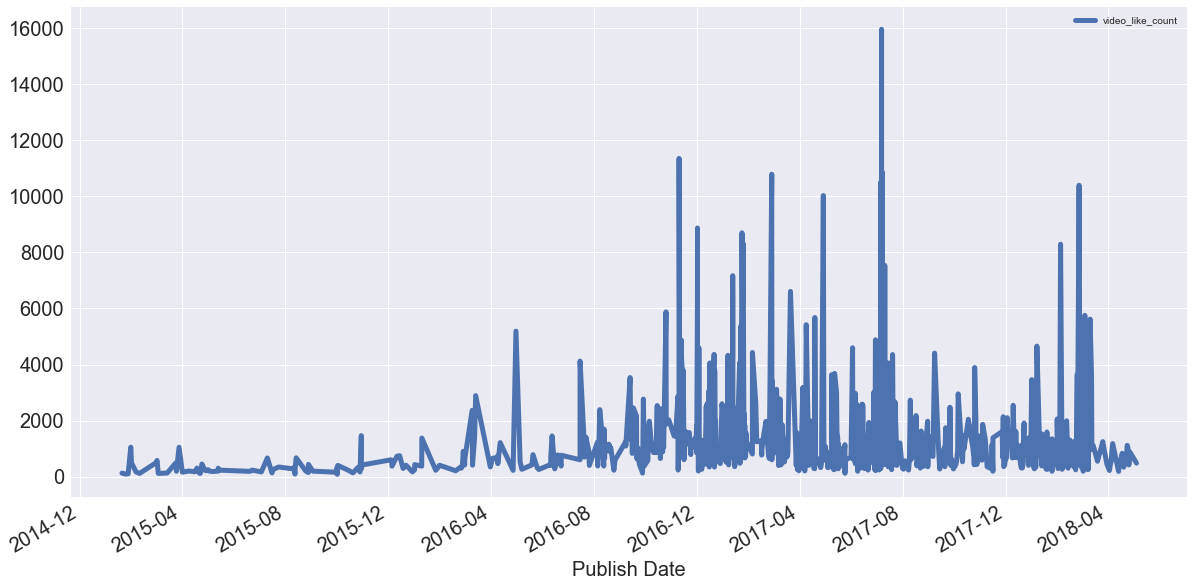

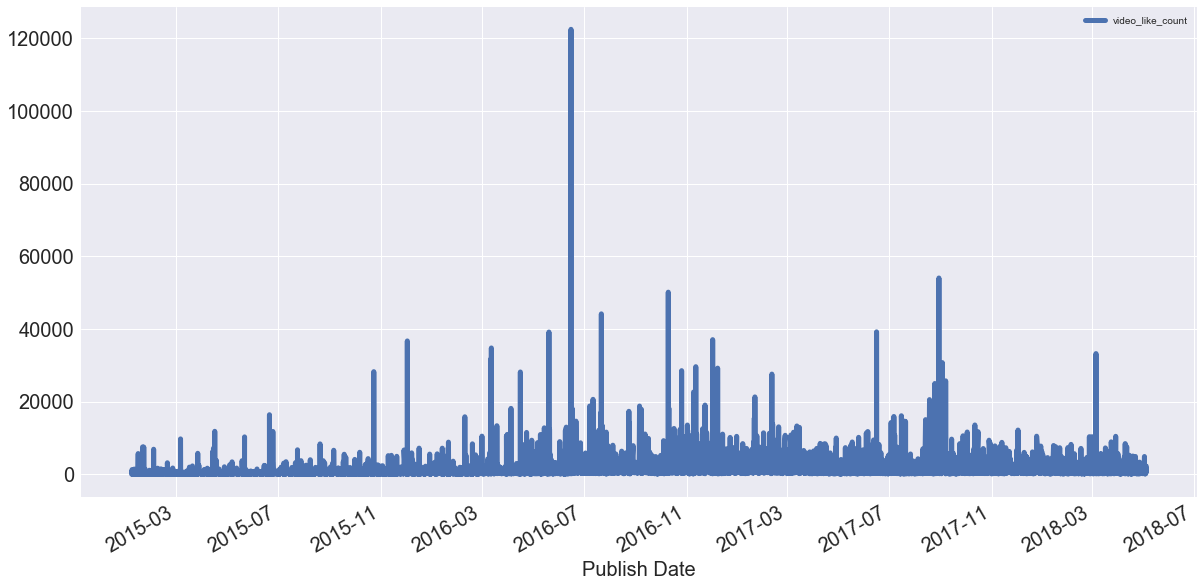

In [224]:
def main():
    video_data = pd.DataFrame.from_csv("../data/video_metadata.csv")
    video_data['video_publish_date'] = pd.to_datetime(video_data['video_publish_date'])

    filter_phrases = open("../data/filter_mm_words.txt").readlines()
    filter_phrases = [phrase.strip().lower() for phrase in filter_phrases]

    filtered_df, other_rows = filter_rows(video_data, filter_phrases)

    analyze(filtered_df, video_data)

if __name__ == "__main__":
    main()
